# Exploratory Data Analysis

In [1]:
# importing the data, load the necessary libraries
import pandas as pd
import numpy as np
Location = "https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/DA0101EN/automobileEDA.csv"
df = pd.read_csv(Location)
df.head()

,symboling,normalized-losses,make,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,...,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,horsepower-binned,diesel,gas
0,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,0.811148,...,9.0,111.0,5000.0,21,27,13495.0,11.190476,Medium,0,1
1,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,0.811148,...,9.0,111.0,5000.0,21,27,16500.0,11.190476,Medium,0,1
2,1,122,alfa-romero,std,two,hatchback,rwd,front,94.5,0.822681,...,9.0,154.0,5000.0,19,26,16500.0,12.368421,Medium,0,1
3,2,164,audi,std,four,sedan,fwd,front,99.8,0.848630,...,10.0,102.0,5500.0,24,30,13950.0,9.791667,Medium,0,1
4,2,164,audi,std,four,sedan,4wd,front,99.4,0.848630,...,8.0,115.0,5500.0,18,22,17450.0,13.055556,Medium,0,1


## Visualizing the Data

In [2]:
# install seaborn
#%%capture
! pip install seaborn

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
# list the data types for each column
df.dtypes

symboling              int64
normalized-losses      int64
make                  object
aspiration            object
num-of-doors          object
body-style            object
drive-wheels          object
engine-location       object
wheel-base           float64
length               float64
width                float64
height               float64
curb-weight            int64
engine-type           object
num-of-cylinders      object
engine-size            int64
fuel-system           object
bore                 float64
stroke               float64
compression-ratio    float64
horsepower           float64
peak-rpm             float64
city-mpg               int64
highway-mpg            int64
price                float64
city-L/100km         float64
horsepower-binned     object
diesel                 int64
gas                    int64
dtype: object

In [4]:
# show the correlation between quantitative variables (int/float)
df.corr()

,symboling,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,diesel,gas
symboling,1.000000,0.466264,-0.535987,-0.365404,-0.242423,-0.550160,-0.233118,-0.110581,-0.140019,-0.008245,-0.182196,0.075819,0.279740,-0.035527,0.036233,-0.082391,0.066171,-0.196735,0.196735
normalized-losses,0.466264,1.000000,-0.056661,0.019424,0.086802,-0.373737,0.099404,0.112360,-0.029862,0.055563,-0.114713,0.217299,0.239543,-0.225016,-0.181877,0.133999,0.238567,-0.101546,0.101546
wheel-base,-0.535987,-0.056661,1.000000,0.876024,0.814507,0.590742,0.782097,0.572027,0.493244,0.158502,0.250313,0.371147,-0.360305,-0.470606,-0.543304,0.584642,0.476153,0.307237,-0.307237
length,-0.365404,0.019424,0.876024,1.000000,0.857170,0.492063,0.880665,0.685025,0.608971,0.124139,0.159733,0.579821,-0.285970,-0.665192,-0.698142,0.690628,0.657373,0.211187,-0.211187
width,-0.242423,0.086802,0.814507,0.857170,1.000000,0.306002,0.866201,0.729436,0.544885,0.188829,0.189867,0.615077,-0.245800,-0.633531,-0.680635,0.751265,0.673363,0.244356,-0.244356
height,-0.550160,-0.373737,0.590742,0.492063,0.306002,1.000000,0.307581,0.074694,0.180449,-0.062704,0.259737,-0.087027,-0.309974,-0.049800,-0.104812,0.135486,0.003811,0.281578,-0.281578
curb-weight,-0.233118,0.099404,0.782097,0.880665,0.866201,0.307581,1.000000,0.849072,0.644060,0.167562,0.156433,0.757976,-0.279361,-0.749543,-0.794889,0.834415,0.785353,0.221046,-0.221046
engine-size,-0.110581,0.112360,0.572027,0.685025,0.729436,0.074694,0.849072,1.000000,0.572609,0.209523,0.028889,0.822676,-0.256733,-0.650546,-0.679571,0.872335,0.745059,0.070779,-0.070779
bore,-0.140019,-0.029862,0.493244,0.608971,0.544885,0.180449,0.644060,0.572609,1.000000,-0.055390,0.001263,0.566936,-0.267392,-0.582027,-0.591309,0.543155,0.554610,0.054458,-0.054458
stroke,-0.008245,0.055563,0.158502,0.124139,0.188829,-0.062704,0.167562,0.209523,-0.055390,1.000000,0.187923,0.098462,-0.065713,-0.034696,-0.035201,0.082310,0.037300,0.241303,-0.241303


In [5]:
# find the correlation between bore, stroke, compression-ratio, and 
# horsepower
dfcopy = df[["bore","stroke","compression-ratio","horsepower"]]
dfcopy.corr()

,bore,stroke,compression-ratio,horsepower
bore,1.000000,-0.055390,0.001263,0.566936
stroke,-0.055390,1.000000,0.187923,0.098462
compression-ratio,0.001263,0.187923,1.000000,-0.214514
horsepower,0.566936,0.098462,-0.214514,1.000000


C:\Users\sarah\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


Text(0.5,1,'Engine Size and Price')

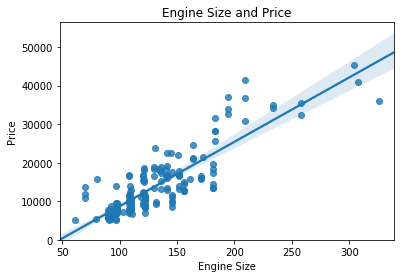

In [6]:
# scatterplot of engine-size and price
sns.regplot(x="engine-size", y="price", data=df)
plt.ylim(0,) # makes it so the y-axis starts at 0
plt.xlabel("Engine Size")
plt.ylabel("Price")
plt.title("Engine Size and Price")

In [7]:
# finding the correlation coeffecient
df[["engine-size","price"]].corr() # R = 0.872335

,engine-size,price
engine-size,1.000000,0.872335
price,0.872335,1.000000


There appears to be a strong positive relationship between engine size and price.

C:\Users\sarah\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


Text(0.5,1,'Highway MPG and Price')

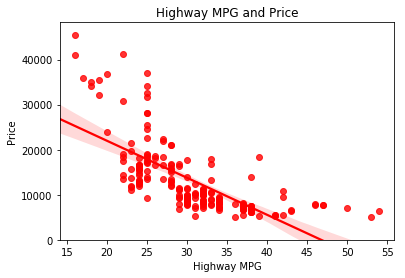

In [8]:
# create a scatterplot for the relationship between highway-mpg and price
sns.regplot(data=df, x="highway-mpg",y="price",color="red")
plt.ylim(0,)
plt.xlabel("Highway MPG")
plt.ylabel("Price")
plt.title("Highway MPG and Price")

There appears to be a strong, negative relationship between Highway-MPG and price.

In [9]:
# calculate pearson's r
df[["highway-mpg","price"]].corr() # R = -0.704692

,highway-mpg,price
highway-mpg,1.000000,-0.704692
price,-0.704692,1.000000


C:\Users\sarah\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


Text(0.5,1,'Peak-RPM and Price')

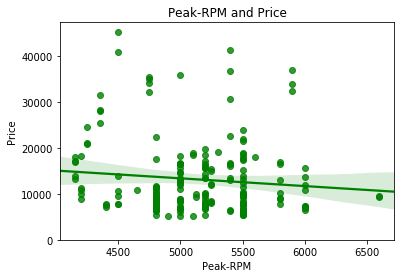

In [10]:
# create a scatterplot for the relationship between peak-rpm and price
sns.regplot(data=df, x="peak-rpm", y="price", color="green")
plt.ylim(0,)
plt.xlabel("Peak-RPM")
plt.ylabel("Price")
plt.title("Peak-RPM and Price")

There appears to be a weak relationship between peak-RPM and price.

In [11]:
# calculate pearson's r
df[["peak-rpm","price"]].corr() # r = -0.101616

,peak-rpm,price
peak-rpm,1.000000,-0.101616
price,-0.101616,1.000000


C:\Users\sarah\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


Text(0.5,1,'Stroke and Price')

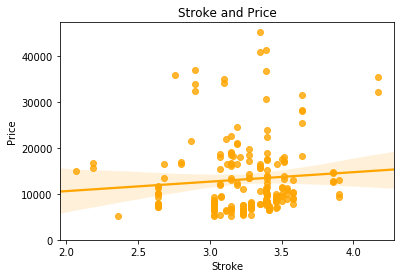

In [12]:
# create a scatterplot for the relationship between stroke and price
sns.regplot(data=df, x="stroke", y="price", color="orange")
plt.ylim(0,)
plt.xlabel("Stroke")
plt.ylabel("Price")
plt.title("Stroke and Price")

There appears to be a weak relationship between stroke and price.

In [13]:
# calculate pearson's r
df[["stroke","price"]].corr()

,stroke,price
stroke,1.00000,0.08231
price,0.08231,1.00000


## Categorical Variables

Text(0.5,1,'Body-Style and Price')

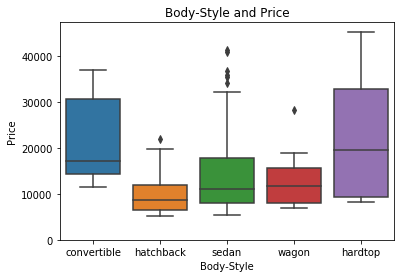

In [14]:
# boxplot for the relationship between body-style and price
sns.boxplot(data=df,x="body-style",y="price")
plt.ylim(0,)
plt.ylabel("Price")
plt.xlabel("Body-Style")
plt.title("Body-Style and Price")

Since there is a lot of overlap between the boxes for each type of body-style, this is likely not a useful predictor of price.

Text(0.5,1,'Engine Location and Price')

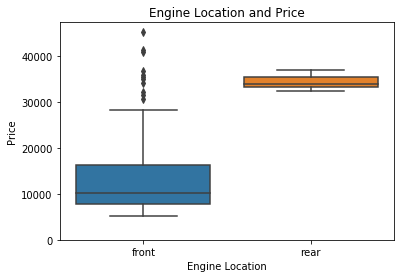

In [15]:
# boxplot for the relationship between engine-location and price
sns.boxplot(data=df,x="engine-location",y="price")
plt.ylim(0,)
plt.ylabel("Price")
plt.xlabel("Engine Location")
plt.title("Engine Location and Price")

In [16]:
df["engine-location"].value_counts()

front    198
rear       3
Name: engine-location, dtype: int64

The difference between price for cars with an engine in the front and back looks large enough that this might be a useful variable in predicting price. However, there are very few observations of cars with an engine in the rear, which may prove problematic in later analyses.

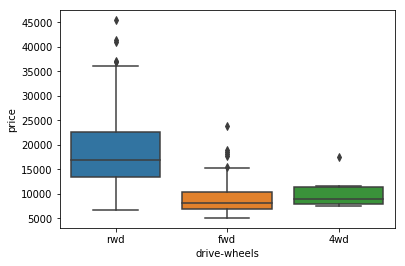

In [17]:
# boxplot for the relationship between drive-wheels and price
sns.boxplot(data=df,x="drive-wheels",y="price")

In [18]:
df["drive-wheels"].value_counts()

fwd    118
rwd     75
4wd      8
Name: drive-wheels, dtype: int64

Since there does appear to be a difference between the different groups based on drive-wheels, this could potentially be a useful predictor variable for price. However, since there are so few observations in the group 4wd, we are limited in the conclusions we can draw about this group.

## Descriptive Statistical Analysis

In [19]:
df.describe() # not including variables of type object

,symboling,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,diesel,gas
count,201.000000,201.00000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,197.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000
mean,0.840796,122.00000,98.797015,0.837102,0.915126,53.766667,2555.666667,126.875622,3.330692,3.256904,10.164279,103.405534,5117.665368,25.179104,30.686567,13207.129353,9.944145,0.099502,0.900498
std,1.254802,31.99625,6.066366,0.059213,0.029187,2.447822,517.296727,41.546834,0.268072,0.319256,4.004965,37.365700,478.113805,6.423220,6.815150,7947.066342,2.534599,0.300083,0.300083
min,-2.000000,65.00000,86.600000,0.678039,0.837500,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000,4.795918,0.000000,0.000000
25%,0.000000,101.00000,94.500000,0.801538,0.890278,52.000000,2169.000000,98.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7775.000000,7.833333,0.000000,1.000000
50%,1.000000,122.00000,97.000000,0.832292,0.909722,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5125.369458,24.000000,30.000000,10295.000000,9.791667,0.000000,1.000000
75%,2.000000,137.00000,102.400000,0.881788,0.925000,55.500000,2926.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16500.000000,12.368421,0.000000,1.000000
max,3.000000,256.00000,120.900000,1.000000,1.000000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,262.000000,6600.000000,49.000000,54.000000,45400.000000,18.076923,1.000000,1.000000


In [20]:
df.describe(include=['object']) # for variables of type object

,make,aspiration,num-of-doors,body-style,drive-wheels,engine-location,engine-type,num-of-cylinders,fuel-system,horsepower-binned
count,201,201,201,201,201,201,201,201,201,200
unique,22,2,2,5,3,2,6,7,8,3
top,toyota,std,four,sedan,fwd,front,ohc,four,mpfi,Low
freq,32,165,115,94,118,198,145,157,92,115


In [21]:
# value counts
df['make'].value_counts()

toyota           32
nissan           18
mazda            17
honda            13
mitsubishi       13
subaru           12
volkswagen       12
volvo            11
peugot           11
dodge             9
bmw               8
mercedes-benz     8
plymouth          7
saab              6
audi              6
porsche           4
alfa-romero       3
chevrolet         3
jaguar            3
isuzu             2
renault           2
mercury           1
Name: make, dtype: int64

In [22]:
# to turn this series into a dataframe
make_counts = df['make'].value_counts().to_frame()
make_counts

,make
toyota,32
nissan,18
mazda,17
honda,13
mitsubishi,13
subaru,12
volkswagen,12
volvo,11
peugot,11
dodge,9


In [23]:
make_counts.rename(columns={"make":"num_vehicles"},inplace=True)
make_counts

,num_vehicles
toyota,32
nissan,18
mazda,17
honda,13
mitsubishi,13
subaru,12
volkswagen,12
volvo,11
peugot,11
dodge,9


In [24]:
make_counts.index.name = "make"
make_counts

,num_vehicles
make,
toyota,32
nissan,18
mazda,17
honda,13
mitsubishi,13
subaru,12
volkswagen,12
volvo,11
peugot,11


In [25]:
# repeat the process for engine location
df['engine-location'].value_counts()

front    198
rear       3
Name: engine-location, dtype: int64

In [26]:
loc_counts = df['engine-location'].value_counts().to_frame()
loc_counts

,engine-location
front,198
rear,3


In [27]:
loc_counts.rename(columns={"engine-location":"Vehicles"},
                 inplace=True)
loc_counts.index.name = "Place"
loc_counts

,Vehicles
Place,
front,198
rear,3


## Basics of Grouping

In [28]:
# display an array of the unique values for this variable
df["drive-wheels"].unique()

array(['rwd', 'fwd', '4wd'], dtype=object)

In [29]:
# find the type of drive wheel with the highest average price
df_group_one = df[["drive-wheels","body-style","price"]]
# grouping results
df_group_one = df_group_one.groupby("drive-wheels",as_index=False).mean()
df_group_one # displays average price for drive wheel

,drive-wheels,price
0,4wd,10241.000000
1,fwd,9244.779661
2,rwd,19757.613333


In [30]:
# grouping by more than one variable
df_group2 = df[["drive-wheels","body-style","price"]]
df_group2 = df_group2.groupby(["drive-wheels","body-style"],
                              as_index=False).mean()
df_group2

,drive-wheels,body-style,price
0,4wd,hatchback,7603.000000
1,4wd,sedan,12647.333333
2,4wd,wagon,9095.750000
3,fwd,convertible,11595.000000
4,fwd,hardtop,8249.000000
5,fwd,hatchback,8396.387755
6,fwd,sedan,9811.800000
7,fwd,wagon,9997.333333
8,rwd,convertible,23949.600000
9,rwd,hardtop,24202.714286


In [31]:
# convert this dataframe into a pivot table
group_pivot = df_group2.pivot(index="drive-wheels",columns="body-style")
# in order to make a pivot table, need to specify which variables
# you want in the rows and columns
group_pivot

price                                            \
body-style   convertible       hardtop     hatchback         sedan   
drive-wheels                                                         
4wd                  NaN           NaN   7603.000000  12647.333333   
fwd              11595.0   8249.000000   8396.387755   9811.800000   
rwd              23949.6  24202.714286  14337.777778  21711.833333   

                            
body-style           wagon  
drive-wheels                
4wd            9095.750000  
fwd            9997.333333  
rwd           16994.222222

In [32]:
# filling empty pivot cells with 0
group_pivot = group_pivot.fillna(0)
group_pivot

price                                            \
body-style   convertible       hardtop     hatchback         sedan   
drive-wheels                                                         
4wd                  0.0      0.000000   7603.000000  12647.333333   
fwd              11595.0   8249.000000   8396.387755   9811.800000   
rwd              23949.6  24202.714286  14337.777778  21711.833333   

                            
body-style           wagon  
drive-wheels                
4wd            9095.750000  
fwd            9997.333333  
rwd           16994.222222

In [60]:
# use the groupby function to find average price of each car 
# based on body style
group2 = df[["body-style","drive-wheels","price"]]
group2 = group2.groupby(["body-style"],
                       as_index=False).mean()
group2

,body-style,price
0,convertible,21890.500000
1,hardtop,22208.500000
2,hatchback,9957.441176
3,sedan,14459.755319
4,wagon,12371.960000


In [95]:
# making a pivot table - practice
df1 = df[["make","body-style","price"]]
make_style = df1.groupby(["make",'body-style'],
                        as_index=False).mean()
ms_pivot = make_style.pivot(index="body-style",columns="make")
ms_pivot.fillna(0, inplace=True) # fill in NaN's
ms_pivot

price                                            \
make        alfa-romero     audi       bmw chevrolet        dodge   
body-style                                                          
convertible     14997.5      0.0      0.00       0.0     0.000000   
hardtop             0.0      0.0      0.00       0.0     0.000000   
hatchback       16500.0      0.0      0.00    5723.0  7819.800000   
sedan               0.0  17647.0  26118.75    6575.0  7619.666667   
wagon               0.0  18920.0      0.00       0.0  8921.000000   

                                                                        \
make               honda    isuzu   jaguar         mazda mercedes-benz   
body-style                                                               
convertible     0.000000      0.0      0.0      0.000000       35056.0   
hardtop         0.000000      0.0      0.0      0.000000       36788.0   
hatchback    7054.428571  11048.0      0.0  10085.000000           0.0   
sedan        9945.000000   6785.0  34600.0  11464.142857       33074.0   
wagon        7295.000000      0.0      0.0      0.000000       28248.0   

                 ...                                                     \
make             ...             nissan        peugot plymouth  porsche   
body-style       ...                                                      
convertible      ...           0.000000      0.000000      0.0  37028.0   
hardtop          ...        8249.000000      0.000000      0.0  33278.0   
hatchback        ...       14409.000000      0.000000   8130.5  22018.0   
sedan            ...        8604.555556  15758.571429   7150.5      0.0   
wagon            ...        9915.666667  15017.500000   8921.0      0.0   

                                                                            \
make        renault          saab       subaru        toyota    volkswagen   
body-style                                                                   
convertible     0.0      0.000000     0.000000  17669.000000  11595.000000   
hardtop         0.0      0.000000     0.000000   9762.333333      0.000000   
hatchback    9895.0  15013.333333  6591.333333   9616.000000   9980.000000   
sedan           0.0  15433.333333  9070.600000   9542.200000   9673.888889   
wagon        9295.0      0.000000  9342.000000   9836.000000  12290.000000   

                           
make                volvo  
body-style                 
convertible      0.000000  
hardtop          0.000000  
hatchback        0.000000  
sedan        18726.875000  
wagon        16293.333333  

[5 rows x 22 columns]

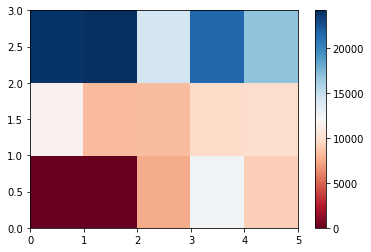

In [54]:
# using a heatmap to visualize the relationship between variables
import matplotlib.pyplot as plt
%matplotlib inline
plt.pcolor(group_pivot,cmap="RdBu")
plt.colorbar()
plt.show()

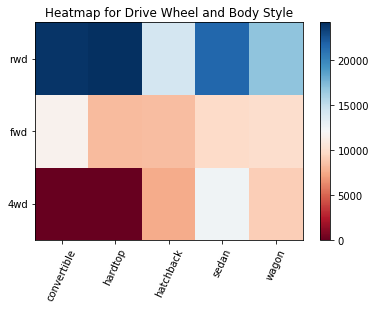

In [93]:
# changing default labels
fig, ax = plt.subplots()
im = ax.pcolor(group_pivot, cmap="RdBu")

# label names
r_lab = group_pivot.columns.levels[1] # gets the values in the first column
    # of the pivot table (aka, the row names)
c_lab = group_pivot.index

# move ticks and labels to the center
ax.set_xticks(np.arange(group_pivot.shape[1]) + 0.5, minor=False)
ax.set_yticks(np.arange(group_pivot.shape[0]) + 0.5, minor=False)

# insert labels
ax.set_xticklabels(r_lab,minor=False)
ax.set_yticklabels(c_lab,minor=False)

# rotate label if too long
plt.xticks(rotation=65)

# set the colorbar
fig.colorbar(im)
plt.title("Heatmap for Drive Wheel and Body Style")
plt.show()

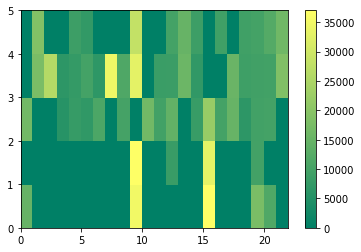

In [94]:
# making a heatmap for previously constructed pivot table
import matplotlib.pyplot as plt
%matplotlib inline
plt.pcolor(ms_pivot,cmap="summer")
plt.colorbar() # includes the colorbar key to the side
plt.show() # displays the heatmap

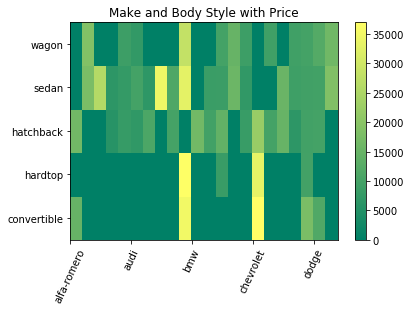

In [117]:
# changing default labels
fig, ax = plt.subplots() # x and y axes
im = ax.pcolor(ms_pivot, cmap="summer") # heatmap itself

# label names
r_lab = ms_pivot.columns.levels[1] # get the row values (make)
c_lab = ms_pivot.index # get the column values (body-style)

# center ticks and labels for y axis (x already looks good)
ax.set_yticks(np.arange(ms_pivot.shape[0]) + 0.5, minor=False)

# insert labels
ax.set_xticklabels(r_lab,minor=False)
ax.set_yticklabels(c_lab,minor=False)

# rotate labels for x axis
plt.xticks(rotation=65)

# show the colorbar
fig.colorbar(im)

# set the title
plt.title("Make and Body Style with Price")

plt.show()

## Correlation and Causation

In [119]:
# quick examination of the correlation between variables
df.corr()

,symboling,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,diesel,gas
symboling,1.000000,0.466264,-0.535987,-0.365404,-0.242423,-0.550160,-0.233118,-0.110581,-0.140019,-0.008245,-0.182196,0.075819,0.279740,-0.035527,0.036233,-0.082391,0.066171,-0.196735,0.196735
normalized-losses,0.466264,1.000000,-0.056661,0.019424,0.086802,-0.373737,0.099404,0.112360,-0.029862,0.055563,-0.114713,0.217299,0.239543,-0.225016,-0.181877,0.133999,0.238567,-0.101546,0.101546
wheel-base,-0.535987,-0.056661,1.000000,0.876024,0.814507,0.590742,0.782097,0.572027,0.493244,0.158502,0.250313,0.371147,-0.360305,-0.470606,-0.543304,0.584642,0.476153,0.307237,-0.307237
length,-0.365404,0.019424,0.876024,1.000000,0.857170,0.492063,0.880665,0.685025,0.608971,0.124139,0.159733,0.579821,-0.285970,-0.665192,-0.698142,0.690628,0.657373,0.211187,-0.211187
width,-0.242423,0.086802,0.814507,0.857170,1.000000,0.306002,0.866201,0.729436,0.544885,0.188829,0.189867,0.615077,-0.245800,-0.633531,-0.680635,0.751265,0.673363,0.244356,-0.244356
height,-0.550160,-0.373737,0.590742,0.492063,0.306002,1.000000,0.307581,0.074694,0.180449,-0.062704,0.259737,-0.087027,-0.309974,-0.049800,-0.104812,0.135486,0.003811,0.281578,-0.281578
curb-weight,-0.233118,0.099404,0.782097,0.880665,0.866201,0.307581,1.000000,0.849072,0.644060,0.167562,0.156433,0.757976,-0.279361,-0.749543,-0.794889,0.834415,0.785353,0.221046,-0.221046
engine-size,-0.110581,0.112360,0.572027,0.685025,0.729436,0.074694,0.849072,1.000000,0.572609,0.209523,0.028889,0.822676,-0.256733,-0.650546,-0.679571,0.872335,0.745059,0.070779,-0.070779
bore,-0.140019,-0.029862,0.493244,0.608971,0.544885,0.180449,0.644060,0.572609,1.000000,-0.055390,0.001263,0.566936,-0.267392,-0.582027,-0.591309,0.543155,0.554610,0.054458,-0.054458
stroke,-0.008245,0.055563,0.158502,0.124139,0.188829,-0.062704,0.167562,0.209523,-0.055390,1.000000,0.187923,0.098462,-0.065713,-0.034696,-0.035201,0.082310,0.037300,0.241303,-0.241303


In [130]:
# the p-value of a correlation represents the probability that the correlation coeffecient
# (Peason's R) is statistically significant
# we can find this probability using the stats module from scipy
from scipy import stats
r, p_val = stats.pearsonr(df["wheel-base"],df["price"])
print("There is a correlation coefficient of ", r, " with a p-value of ", 
      p_val," for the relationship between wheel-base and price.")

There is a correlation coefficient of  0.5846418222655081  with a p-value of  8.076488270732955e-20  for the relationship between wheel-base and price.


Based on the correlation coefficient, the relationship between wheel-base and price is moderate and positive. Based on the p-value, the correlation coefficient is statistically significant.

In [140]:
# horsepower vs price
r, p_val = stats.pearsonr(df["horsepower"],df["price"])
print("There is a correlation coefficient of ", r, " with a p-value of ",
      p_val," for the relationship between horsepower and price.")

There is a correlation coefficient of  0.8095745670036559  with a p-value of  6.36905742825998e-48  for the relationship between horsepower and price.


Based on the correlation coefficient, the relationship between horsepower and price is strong and positive. Based on the p-value, the correlation coefficient is statistically significant.

In [141]:
# length vs price
r, p_val = stats.pearsonr(df["length"],df["price"])
print("There is a correlation coefficient of ", r, " with a p-value of ", 
      p_val," for the relationship between length and price.")

There is a correlation coefficient of  0.690628380448364  with a p-value of  8.016477466159053e-30  for the relationship between length and price.


Based on the correlation coefficient, the relationship between length and price is moderately strong and positive. Based on the p-value, the correlation coefficient is statistically significant.

In [148]:
# width vs price
r, p_val = stats.pearsonr(df["width"], df["price"])
print("There is a correlation coefficient of ", r, " with a p-value of ", 
      p_val," for the relationship between width and price.")

There is a correlation coefficient of  0.7512653440522674  with a p-value of  9.200335510481426e-38  for the relationship between width and price.


Based on the correlation coefficient, the relationship between width and price is moderately strong and positive. Based on the p-value, the correlation coefficient is statistically significant.

In [149]:
# engine-size vs price
r, p_val = stats.pearsonr(df["engine-size"], df["price"])
print("There is a correlation coefficient of ", r, " with a p-value of ", 
      p_val," for the relationship between engine-size and price.")

There is a correlation coefficient of  0.8723351674455185  with a p-value of  9.265491622197996e-64  for the relationship between engine-size and price.


Based on the correlation coefficient, the relationship between engine-size and price is strong and positive. Based on the p-value, the correlation coefficient is statistically significant.

In [150]:
# city-mpg vs price
r, p_val = stats.pearsonr(df["city-mpg"], df["price"])
print("There is a correlation coefficient of ", r, " with a p-value of ", 
      p_val," for the relationship between city-mpg and price.")

There is a correlation coefficient of  -0.6865710067844677  with a p-value of  2.3211320655676368e-29  for the relationship between city-mpg and price.


Based on the correlation coefficient, the relationship between city-mpg and price is moderately strong and negative. Based on the p-value, the correlation coefficient is statistically significant.

In [151]:
r, p_val = stats.pearsonr(df["highway-mpg"], df["price"])
print("There is a correlation coefficient of ", r, " with a p-value of ", 
      p_val," for the relationship between highway-mpg and price.")

There is a correlation coefficient of  -0.7046922650589529  with a p-value of  1.7495471144476807e-31  for the relationship between highway-mpg and price.


Based on the correlation coefficient, the relationship between highway-mpg and price is moderately strong and negative. Based on the p-value, the correlation coefficient is statistically significant.

## ANOVA

In [156]:
# conducting an ANOVA analysis for drive-wheels
# first step is to group the data based on the variable we are interested in (drive-wheels)
grouped = df[["drive-wheels","price"]].groupby("drive-wheels")

In [159]:
# get group
grouped.get_group("4wd")["price"] # will use this in ANOVA test

4      17450.0
136     7603.0
140     9233.0
141    11259.0
144     8013.0
145    11694.0
150     7898.0
151     8778.0
Name: price, dtype: float64

In [160]:
df["drive-wheels"].unique()

array(['rwd', 'fwd', '4wd'], dtype=object)

In [171]:
# ANOVA test
from scipy import stats
f_val, p_val = stats.f_oneway(grouped.get_group("rwd")["price"], 
                              grouped.get_group("fwd")["price"],
                              grouped.get_group("4wd")["price"])
print("ANOVA Results: \n Global F = ", f_val, "\n P-Val = ", p_val)

ANOVA Results: 
 Global F =  67.95406500780398 
 P-Val =  3.3945443577151245e-23


Based on these findings, there is a statistically significant difference between the mean price of cars grouped by drive-wheel.

In [170]:
# ANOVA test between individual groups (drive-wheel)
# fwd and rwd
f_val, p_val = stats.f_oneway(grouped.get_group("rwd")["price"], 
                              grouped.get_group("fwd")["price"])
print("ANOVA Results: \n Global F = ", f_val, "\n P-Val = ", p_val)

ANOVA Results: 
 Global F =  130.55331609591104 
 P-Val =  2.235530635567824e-23


The difference between the mean price for fwd and rwd is statistically significant.

In [173]:
# 4wd and rwd
f_val, p_val = stats.f_oneway(grouped.get_group("4wd")["price"], 
                              grouped.get_group("rwd")["price"])
print("ANOVA Results: \n Global F = ", f_val, "\n P-Val = ", p_val)

ANOVA Results: 
 Global F =  8.580681368924756 
 P-Val =  0.004411492211225333


The difference between the mean price for 4wd and rwd is statistically significant.

In [174]:
# fwd and 4wd
f_val, p_val = stats.f_oneway(grouped.get_group("4wd")["price"], 
                              grouped.get_group("fwd")["price"])
print("ANOVA Results: \n Global F = ", f_val, "\n P-Val = ", p_val)

ANOVA Results: 
 Global F =  0.665465750252303 
 P-Val =  0.41620116697845666


The difference between the mean price for fwd and 4wd is not statistically significant.